<a href="https://colab.research.google.com/github/jimmyjamesarnold/DataChallenge/blob/master/tree/master/videoGameSalesVideo_Games_Analysis_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=red> Project: Analysis of Sales of Video Games
### You work for a data science consulting company. A major video game production company has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:
### 1. What are some major differences between the North American, European, and Japanese video game markets?
### 2. What video game genres are trending in each market?
### 3. What features about a video game are most indicative of its success?

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jimmyjamesarnold/DataChallenge/master/videoGameSales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## What video game genres are trending in each market?

In [0]:
## 1. Top 3 genre: Total sales of each genre of all time
df_genre_total = df.groupby(['Genre'])["NA_Sales",'EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()

NA_top3 = df_genre_total['NA_Sales'].sort_values(ascending=False).iloc[:3]
print('North America:',NA_top3.index)

EU_top3 = df_genre_total['EU_Sales'].sort_values(ascending=False).iloc[:3]
print('Europian Union:',EU_top3.index)

JP_top3 = df_genre_total['JP_Sales'].sort_values(ascending=False).iloc[:3]
print('Japan:',JP_top3.index)

North America: Index(['Action', 'Sports', 'Shooter'], dtype='object', name='Genre')
Europian Union: Index(['Action', 'Sports', 'Shooter'], dtype='object', name='Genre')
Japan: Index(['Role-Playing', 'Action', 'Sports'], dtype='object', name='Genre')


In [0]:
## 2. Top 3 genre: Mean sales (total sales divide by number of games released)
df_genre_mean = df.groupby(['Genre'])["NA_Sales",'EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()

NA_top3 = df_genre_mean['NA_Sales'].sort_values(ascending=False).iloc[:3]
print('North America:',NA_top3.index)

EU_top3 = df_genre_mean['EU_Sales'].sort_values(ascending=False).iloc[:3]
print('Europian Union:',EU_top3.index)

JP_top3 = df_genre_mean['JP_Sales'].sort_values(ascending=False).iloc[:3]
print('Japan:',JP_top3.index)

North America: Index(['Platform', 'Shooter', 'Sports'], dtype='object', name='Genre')
Europian Union: Index(['Shooter', 'Platform', 'Racing'], dtype='object', name='Genre')
Japan: Index(['Role-Playing', 'Platform', 'Fighting'], dtype='object', name='Genre')


In [0]:
NA_top3.head()

Genre
Platform    0.504571
Shooter     0.444733
Sports      0.291283
Name: NA_Sales, dtype: float64

In [0]:
## 3. Top 3 genre:
   # Step a: each game's sales divide the length of years released: i.e. 2000 released; sales cut to 2014, so sales need to divide by (2014-2000)=14
   # Step b: Rank all games based on the normalized sales
   # Step c: for top 100 games, count the top 3 genre of the game!

In [0]:
# Step a
df_test = df
df_test['aa'] = np.array([2017]*len(df_test.Year.values)) - df_test.Year.values
df_test['NA_Sales'] = df_test['NA_Sales'] / df_test['aa']
df_test['EU_Sales'] = df_test['EU_Sales'] / df_test['aa']
df_test['JP_Sales'] = df_test['JP_Sales'] / df_test['aa']
df_test['Other_Sales'] = df_test['Other_Sales'] / df_test['aa']
df_test['Global_Sales'] = df_test['Global_Sales'] / df_test['aa']
df_test.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,aa
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.771818,2.638182,0.342727,0.769091,7.521818,11.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.908750,0.111875,0.212812,0.024063,1.257500,32.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,1.761111,1.431111,0.421111,0.367778,3.980000,9.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,1.968750,1.376250,0.410000,0.370000,4.125000,8.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.536667,0.423333,0.486667,0.047619,1.493810,21.0


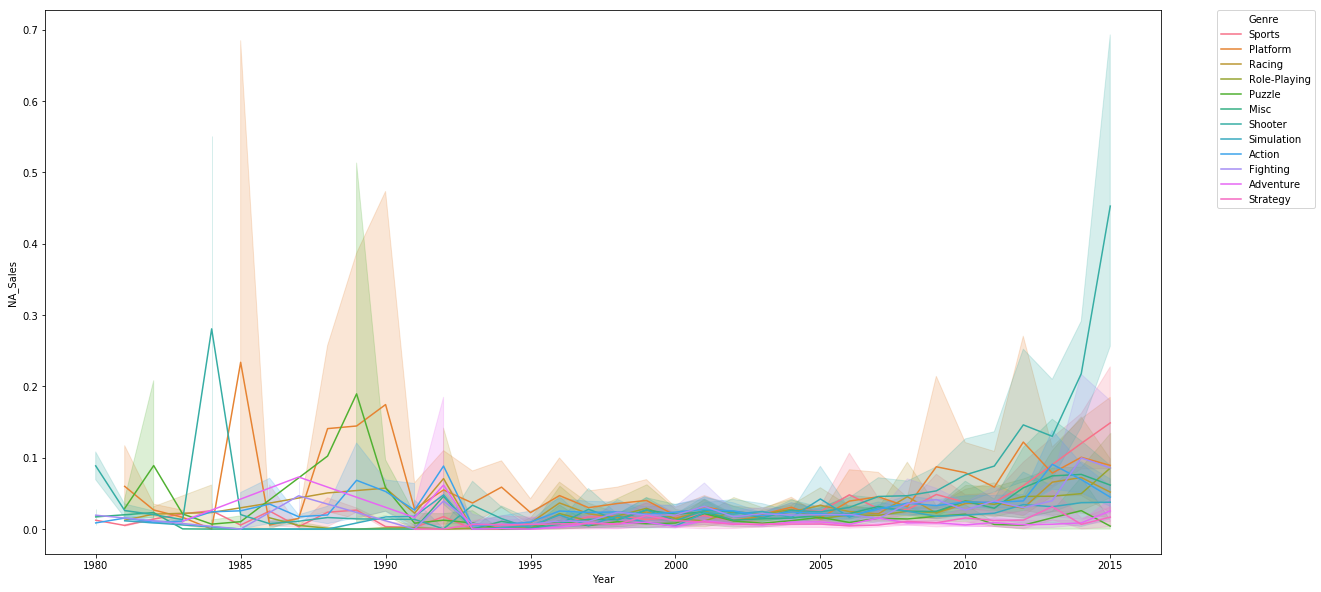

In [0]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x='Year',y='NA_Sales',hue='Genre',data=df_test[df_test.Year < 2016])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

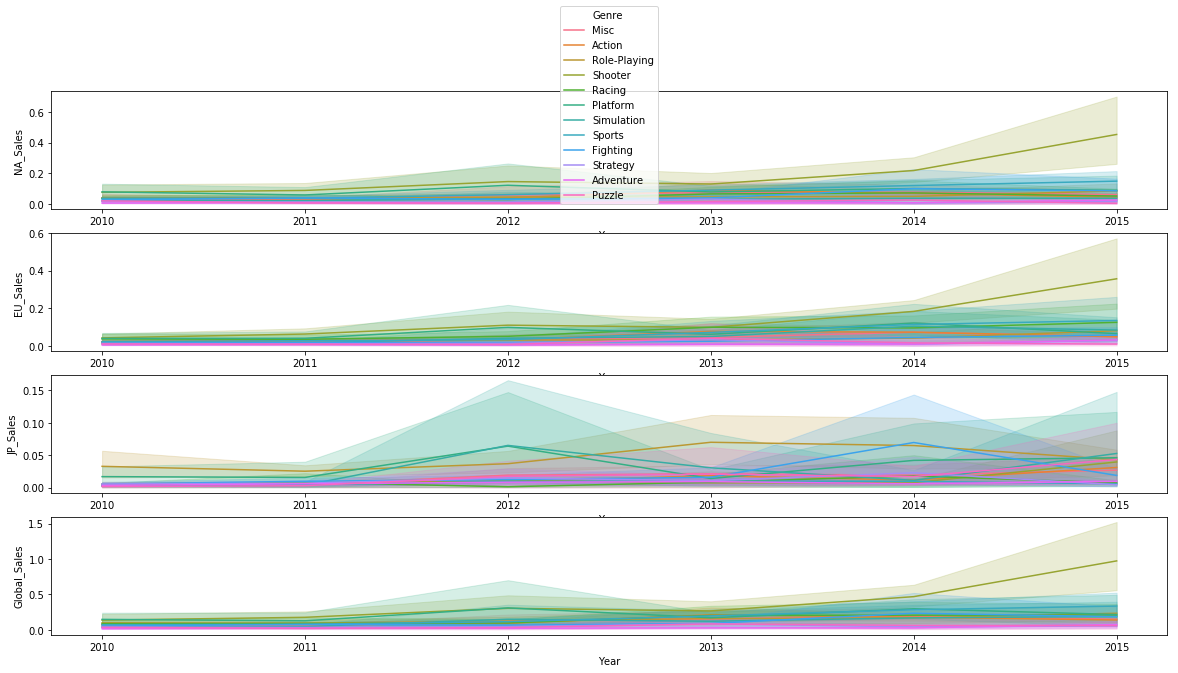

In [46]:
fig, ax = plt.subplots(4,1, figsize=(20,10))
#plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='NA_Sales',hue='Genre',data=df_test[(df_test.Year < 2016)&(df_test.Year >= 2010)], ax=ax[0])
sns.lineplot(x='Year',y='EU_Sales',hue='Genre',data=df_test[(df_test.Year < 2016)&(df_test.Year >= 2010)], ax=ax[1], legend=False)
sns.lineplot(x='Year',y='JP_Sales',hue='Genre',data=df_test[(df_test.Year < 2016)&(df_test.Year >= 2010)], ax=ax[2], legend=False)
sns.lineplot(x='Year',y='Global_Sales',hue='Genre',data=df_test[(df_test.Year < 2016)&(df_test.Year >= 2010)], ax=ax[3], legend=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


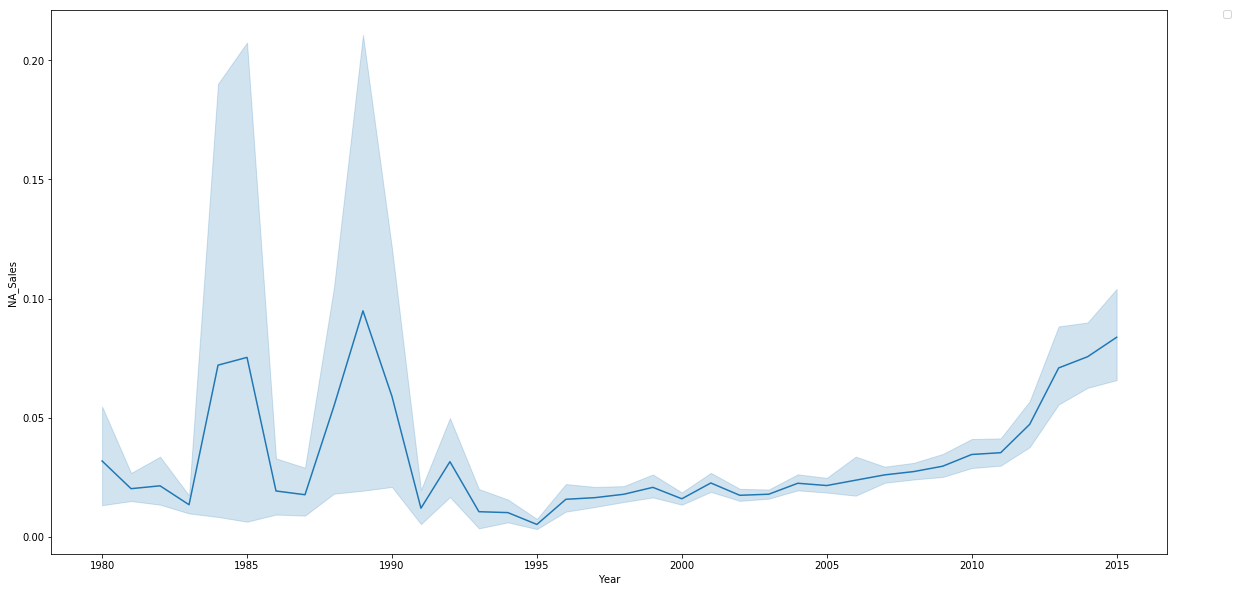

In [0]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year',y='NA_Sales',data=df_test[df_test.Year < 2016])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [0]:
# Step b: Rank all games based on the normalized sales
df_test_NA = df_test.sort_values(by='NA_Sales',ascending=False)

# Step c: for top 100 games, count the top 3 genre of the game!
NA_top_100 = df_test_NA.iloc[:100]
NA_top3 = NA_top_100.groupby(['Genre'])['Name'].count()
print(NA_top3.sort_values(ascending=False).iloc[:3].index)

## For EU
df_test_EU = df_test.sort_values(by='EU_Sales',ascending=False)
EU_top_100 = df_test_EU.iloc[:100]
EU_top3 = EU_top_100.groupby(['Genre'])['Name'].count()
print(EU_top3.sort_values(ascending=False).iloc[:3].index)

## For JP
df_test_JP = df_test.sort_values(by='JP_Sales',ascending=False)
JP_top_100 = df_test_JP.iloc[:100]
JP_top3 = JP_top_100.groupby(['Genre'])['Name'].count()
print(JP_top3.sort_values(ascending=False).iloc[:3].index)


Index(['Shooter', 'Action', 'Sports'], dtype='object', name='Genre')
Index(['Shooter', 'Sports', 'Action'], dtype='object', name='Genre')
Index(['Role-Playing', 'Action', 'Misc'], dtype='object', name='Genre')


In [0]:
## Why it won't work ....
A = ['NA_Sales','EU_Sales','JP_Sales']
for n in A:
    print (n)
    top100 = df_test.sort_values(by= n,ascending=False).iloc[:100]
    top3 = top_100.groupby(['Genre'])['Name'].count()
    print(top3.sort_values(ascending=False).iloc[:3].index)

NA_Sales


NameError: ignored

In [0]:
import seaborn as sns
sns.lineplot(x='Year', y='NA_Sales',data=df)

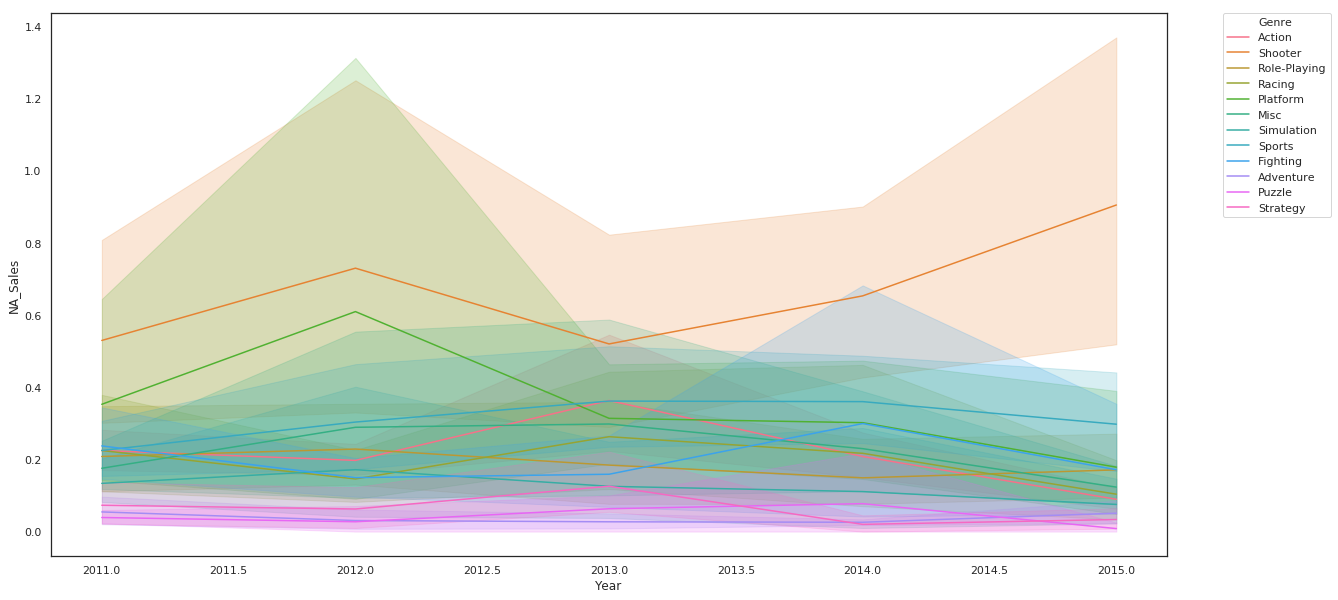

In [48]:
# look at recent history of NA_Sales by Genre
sns.set(context='notebook',style='white')
plt.figure(figsize=(20,10))
sns.lineplot(x='Year', y='NA_Sales',hue='Genre', data=df[(df.Year > 2010) & (df.Year<2016)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [50]:
df.groupby('Year')['NA_Sales'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1980.0,9.0,1.176667,1.282624,0.22,0.3200,0.720,1.0700,4.00
1981.0,46.0,0.726087,0.730885,0.12,0.2925,0.435,0.8925,4.21
1982.0,36.0,0.747778,1.172248,0.13,0.3150,0.500,0.7225,7.28
1983.0,17.0,0.456471,0.278903,0.01,0.3100,0.430,0.5100,1.22
1984.0,14.0,2.377143,7.089785,0.00,0.0450,0.345,0.7700,26.93


In [0]:
df_genre_year = df.groupby(['Year','Genre'])['Name'].count().reset_index() #.unstack().fillna(0)

sns.lineplot(x='Year', y='Name',hue='Genre', data=df_genre_year[df_genre_year.Year < 2015])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Conclusion:

## What features about a video game are most indicative of its success?

In [0]:
df_NA = df.drop(['Year','Rank','Name','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','aa'],axis=1)
df_NA.head()

,Platform,Genre,Publisher,NA_Sales
0,Wii,Sports,Nintendo,3.771818
1,NES,Platform,Nintendo,0.908750
2,Wii,Racing,Nintendo,1.761111
3,Wii,Sports,Nintendo,1.968750
4,GB,Role-Playing,Nintendo,0.536667


In [0]:
# Create dummy variables for categorical features
    # https://www.southampton.ac.uk/passs/confidence_in_the_police/multivariate_analysis/linear_regression.page
#df_NA = df.drop(['Year','Rank','Name','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','Publisher'],axis=1)
df_NA = pd.get_dummies(df_NA, columns=["Platform","Genre",'Publisher'])
df_NA.head()

,NA_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,3.771818,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.908750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.761111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.968750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.536667,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_NA.dropna(inplace=True)
df_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 0 to 16597
Columns: 622 entries, NA_Sales to Publisher_responDESIGN
dtypes: float64(1), uint8(621)
memory usage: 9.9 MB


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

# split into training and test data
y = df_NA['NA_Sales'].values
X = df_NA.drop(['NA_Sales'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf = RandomForestRegressor(random_state = 42)

#param_grid = {
#    'bootstrap': [True, False],
 #   'max_depth': [1, 2, 3, None],
  #  'max_features': [2, 3, 'auto'],
   # 'min_samples_leaf': [1, 2, 5],
    #'min_samples_split': [2, 5, 10],
    #'n_estimators': [10, 20, 50, 100, 200]
#}

# run grid search
#grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:',metrics.r2_score(y_test, y_pred))
print()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE: 0.03203038024603417
RMSE: 0.112177344169953
R2: 0.20233537778641209



In [0]:
# rf = RandomForestRegressor(random_state = 42)

# param_grid = {
#     'bootstrap': [True, False],
#     'max_depth': [1, 2, 3, None],
#     'max_features': [2, 3, 'auto'],
#     'min_samples_leaf': [1, 2, 5],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [10, 20, 50, 100, 200]
# }

# # run grid search
# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

## Engineering new features for predicting success

In [0]:
# first, define title's annual rank:
# define 'success' as being the top selling game (or maybe top 10) based on the year it came out.

df['yearNARank']= df.groupby('Year')['NA_Sales'].rank(ascending=False)

In [95]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,yearNARank,yealyPublisherTitles,yealyGenreTitles,yealyPlatformTitles,pubRank
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0,53,138,44,27.0
1,7082,Super Swing Golf,Wii,2006.0,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23,307.0,53,138,44,27.0
2,3977,Madden NFL 07,Wii,2006.0,Sports,Electronic Arts,0.46,0.00,0.00,0.04,0.50,112.0,102,138,44,51.5
3,3623,Rapala Tournament Fishing!,Wii,2006.0,Sports,Activision,0.51,0.00,0.00,0.04,0.56,100.5,50,138,44,25.5
4,3914,SpongeBob SquarePants: Creature from the Krust...,Wii,2006.0,Platform,THQ,0.45,0.02,0.00,0.04,0.51,116.5,57,54,44,29.0


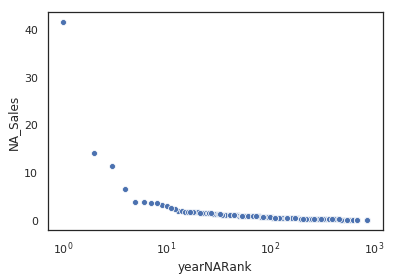

In [141]:
sns.scatterplot(x='yearNARank', y='NA_Sales', data=df[df['Year']==2006])
plt.xscale('log')

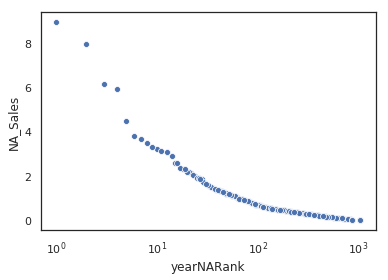

In [140]:
sns.scatterplot(x='yearNARank', y='NA_Sales', data=df[df['Year']==2007])
plt.xscale('log')

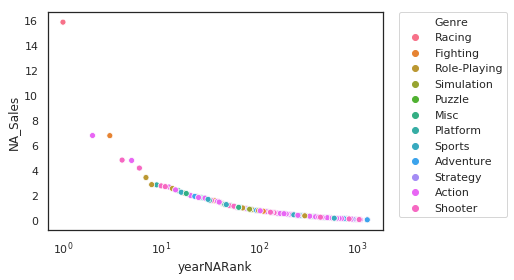

In [138]:
sns.scatterplot(x='yearNARank', y='NA_Sales', hue='Genre', data=df[df['Year']==2008])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')

In [139]:
df[(df['Year']==2008) & (df['yearNARank']<=10)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,yearNARank,yealyPublisherTitles,yealyGenreTitles,yealyPlatformTitles,pubRank
1021,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1.0,32,82,282,676.0
1044,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04,3.0,32,57,282,676.0
1347,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92,9.0,37,62,139,606.0
1390,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57,5.0,41,221,139,565.0
1421,167,Call of Duty: World at War,PS3,2008.0,Shooter,Activision,2.72,1.87,0.00,0.84,5.43,10.0,88,83,139,233.0
1462,209,Fallout 3,X360,2008.0,Role-Playing,Bethesda Softworks,3.39,1.03,0.09,0.44,4.96,7.0,7,112,146,1148.0
1531,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02,2.0,41,221,146,565.0
1566,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37,4.0,88,83,146,233.0
1569,119,Gears of War 2,X360,2008.0,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76,6.0,10,83,146,1070.0
1706,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84,8.0,32,112,492,676.0


# IDEA for Next Steps

1) Label "success" = top 10 games per year (seems reasonable based on sales distributions)
- keep in mind sales represents cumulative sales...
- turn this into a classification problem

2) Use NLP on game titles. Extract features (assumption: Mario sells well)

In [99]:
# check groupby does what we think it does
df[(df['Publisher']=='Nintendo') & (df['Year']==2006)].shape

(53, 16)

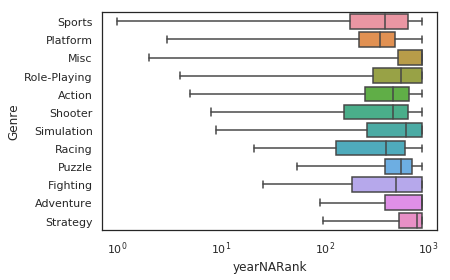

In [59]:
# Now, EDA on yearNARank
sns.boxplot(y='Genre', x='yearNARank', data=df[df.Year==2006])
plt.xscale('log')

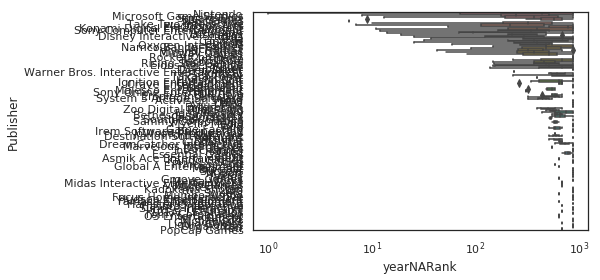

In [60]:
# Now, EDA on yearNARank
sns.boxplot(y='Publisher', x='yearNARank', data=df[df.Year==2006])
plt.xscale('log')

In [0]:
x = df.groupby(['Year','Publisher'])['Name'].count().reset_index().rename(columns={'Name':'yealyPublisherTitles'})
df = pd.merge(df,x, on=['Year', 'Publisher'])

x = df.groupby(['Year','Genre'])['Name'].count().reset_index().rename(columns={'Name':'yealyGenreTitles'})
df = pd.merge(df,x, on=['Year', 'Genre'])

x = df.groupby(['Year','Platform'])['Name'].count().reset_index().rename(columns={'Name':'yealyPlatformTitles'})
df = pd.merge(df,x, on=['Year', 'Platform'])

In [0]:
df['pubRank'] = df.groupby(['Year'])['yealyPublisherTitles'].rank(ascending=False)#.reset_index()#.rename(columns={'Name':'yealyPublisherTitles'})
#df = pd.merge(df,x, on=['Year', 'Publisher'])

In [112]:
df.groupby(['Year'])['yealyPublisherTitles'].rank(ascending=False).head()

0    379.0
1    379.0
2     51.5
3    481.5
4    324.0
Name: yealyPublisherTitles, dtype: float64

In [90]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,yearNARank,yealyPublisherTitles,yealyGenreTitles,yealyPlatformTitles,pubRank
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0,53,138,44,27.0
1,7082,Super Swing Golf,Wii,2006.0,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23,307.0,53,138,44,27.0
2,3977,Madden NFL 07,Wii,2006.0,Sports,Electronic Arts,0.46,0.00,0.00,0.04,0.50,112.0,102,138,44,51.5
3,3623,Rapala Tournament Fishing!,Wii,2006.0,Sports,Activision,0.51,0.00,0.00,0.04,0.56,100.5,50,138,44,25.5
4,3914,SpongeBob SquarePants: Creature from the Krust...,Wii,2006.0,Platform,THQ,0.45,0.02,0.00,0.04,0.51,116.5,57,54,44,29.0


In [129]:
df['pubRank'] = df.groupby(['Year'])['yealyPublisherTitles'].rank(ascending=False, method='min')
df[df.Year==2006].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,yearNARank,yealyPublisherTitles,yealyGenreTitles,yealyPlatformTitles,pubRank
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0,53,138,44,353.0
1,7082,Super Swing Golf,Wii,2006.0,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23,307.0,53,138,44,353.0
2,3977,Madden NFL 07,Wii,2006.0,Sports,Electronic Arts,0.46,0.00,0.00,0.04,0.50,112.0,102,138,44,1.0
3,3623,Rapala Tournament Fishing!,Wii,2006.0,Sports,Activision,0.51,0.00,0.00,0.04,0.56,100.5,50,138,44,457.0
4,3914,SpongeBob SquarePants: Creature from the Krust...,Wii,2006.0,Platform,THQ,0.45,0.02,0.00,0.04,0.51,116.5,57,54,44,296.0
5,11956,Open Season,Wii,2006.0,Platform,Ubisoft,0.06,0.00,0.00,0.01,0.07,484.0,61,54,44,235.0
6,11412,Ice Age 2: The Meltdown,Wii,2006.0,Platform,Vivendi Games,0.06,0.01,0.00,0.01,0.08,484.0,19,54,44,739.0
7,11146,The Ant Bully,Wii,2006.0,Platform,Midway Games,0.08,0.00,0.00,0.01,0.09,436.5,25,54,44,669.0
8,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2.0,53,109,44,353.0
9,15278,World Championship Poker featuring Howard Lede...,Wii,2006.0,Misc,505 Games,0.02,0.00,0.00,0.00,0.02,634.5,22,109,44,717.0


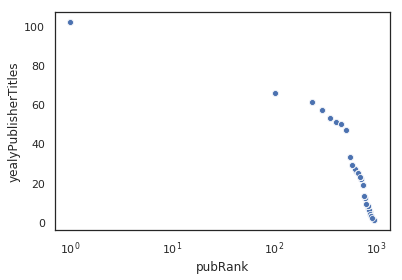

In [127]:
# Now, EDA on yearNARank
sns.scatterplot(y='yealyPublisherTitles', x='pubRank', data=df[df.Year==2006])
plt.xscale('log')

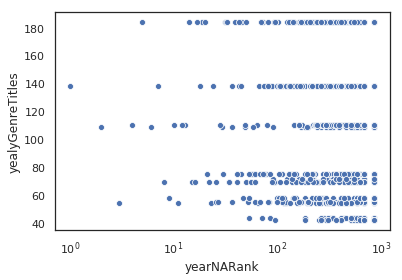

In [106]:
# Now, EDA on yearNARank
sns.scatterplot(y='yealyGenreTitles', x='yearNARank', data=df[df.Year==2006])
plt.xscale('log')

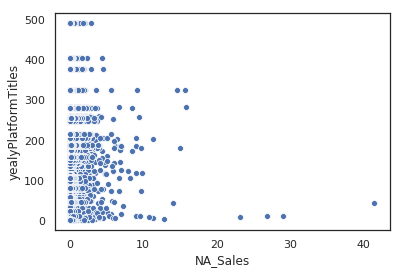

In [111]:
# Now, EDA on yearNARank
sns.scatterplot(y='yealyPlatformTitles', x='yearNARank', data=df)
#plt.xscale('log')

In [0]:
# turn this problem into a classification problem

In [0]:
df_NA = df[['Publisher','Platform','Year','Genre', 'yearly_NARank']]
df_NA.head()
df_NA.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_NA = pd.get_dummies(df_NA, columns=["Platform","Genre",'Publisher'])
df_NA.head()

,Year,yearly_NARank,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2006.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

# split into training and test data
y = df_NA['yearly_NARank'].values
X = df_NA.drop(['yearly_NARank'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf = RandomForestRegressor(random_state = 42)

#param_grid = {
#    'bootstrap': [True, False],
 #   'max_depth': [1, 2, 3, None],
  #  'max_features': [2, 3, 'auto'],
   # 'min_samples_leaf': [1, 2, 5],
    #'min_samples_split': [2, 5, 10],
    #'n_estimators': [10, 20, 50, 100, 200]
#}

# run grid search
#grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:',metrics.r2_score(y_test, y_pred))
print()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE: 157.2081631768712
RMSE: 229.34356692480864
R2: 0.54936794479621

